In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
k = 8.61e-5
q = 1.6e-19
bottom_concentration = 1e16 # Концентрация в Si
E = 180000  # Заданная величина поля
Q = 5e14 # Доза имплантации
T = 1273 # Температура отжига, К
n = 1000 # Кол-во точек построения
Xmax = 1 # Глубина, до которой идет расчет значений, мкм
dx = Xmax / n # Шаг по х
dt = 1
tt = 900 # Время отжига, с

# Коэффициенты а для расчета Rp и deltaRp
a1 = 0.000668
a2 = 0.921
a3 = 0.005072
a4 = 0.000241
a5 = 0.884
a6 = 0.000923

In [3]:
# Расчет Rp и deltaRp, перевод в см
Rp = (a1 * (E ** a2) + a3) / 10000000
delRp = (a4 * (E ** a5) + a6) / 10000000

In [10]:
# Функция расчета концентрации при распределении Гаусса
def implantation(x):
    f = Q / (2.5 * delRp) * mt.exp(- ((x / 10000 - Rp) ** 2) / (2 * delRp ** 2))
    return f

Nc = 6.2e15 * T ** 1.5
Nv = 3.5e15 * T ** 1.5
Eg = 1.17 - 4.73e-4 * (T ** 2) / ( T + 636 )
ni = ((Nc * Nv / 2) ** 0.5) * mt.exp(-Eg / (2 * k * T))

# Функиция расчета коэффициента диффузии
def diffusion_coeff(C, temperature, ni):
    # return 1e-12
    Nc = 6.2e15 * T ** 1.5
    Nv = 3.5e15 * T ** 1.5
    Eg = 1.17 - 4.73e-4 * (T ** 2) / ( T + 636 )
    ni = ((Nc * Nv / 2) ** 0.5) * mt.exp(-Eg / (2 * k * T))
    coef = 0.214 * mt.exp(-3.65/(k*temperature)) + 15 * C / ni * mt.exp(-4.08/(k*temperature))
    return coef

In [11]:
# Функция расчета глубины залегания p-n перехода
def pn_junction(x, concentration, baseImpurity = bottom_concentration):
    for i in range(1, len(concentration)):
        if (concentration[i] > baseImpurity) and (concentration[i + 1] < baseImpurity):
            # print('p-n переход находится на глубине в {:.3f} мкм'.format(x[i]))
            return 'p-n переход находится на глубине в {:.3f} мкм'.format(x[i])
        else:
            pass

In [12]:
# Создание массивов нулевых значений
C = np.empty(n + 1)
C1 = np.zeros(n + 1)
X = np.zeros(n + 1)
a = np.zeros(n + 1)
b = np.zeros(n + 1)
d = np.zeros(n + 1)
r = np.zeros(n + 1)
delta = np.zeros(n + 1)
lam = np.zeros(n + 1)

In [13]:
# Первые значения массива концентраций распределения Гаусса
X[1] = 0
C[1] = implantation(X[1])

# Заполнение массива концентраций для распределения Гаусса
for i in range(2, n - 1):
    X[i] = X[i - 1] + dx
    C[i] = implantation(X[i])

for i in range(2, n-1)    
C1[i] = C[i]

In [14]:
# Граничные условия разгонки примеси
a[1] = -1
b[1] = 0
d[1] = 1
r[1] = 0

a[n] = 1
b[n] = 0
d[n] = 0
r[n] = 0

# Включение интерактивного режима работы с библиотекой графического представления
plt.ion()

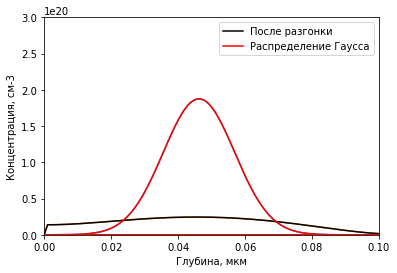

'p-n переход находится на глубине в 0.118 мкм'

<Figure size 432x288 with 0 Axes>

In [15]:
# Получение массива значений концентрации для каждого значения времени
for g in range(1, tt, 1):
    for i in range(2, n - 1):
        a[i] = -(2 + ((dx ** 2) * 1e-8 / (diffusion_coeff(C[i], T, ni) * dt)))
        b[i] = 1
        d[i] = 1
        r[i] = -((dx ** 2) * 1e-8 * C[i]) / (diffusion_coeff(C[i], T, ni) * dt)
    delta[1] = -d[1] / a[1]
    lam[1] = r[1] / a[1]
    for i in range(2, n - 1):
        delta[i] = - d[i] / (a[i] + b[i] * delta[i - 1])
        lam[i] = (r[i] - b[i] * lam[i - 1]) / (a[i] + b[i] * delta[i - 1])
    C[n] = lam[n]
    for i in range(n - 1, 1, -1):
        C[i] = delta[i] * C[i + 1] + abs(lam[i])

# Анимированное отображение графика в цикле
plt.clf()
plt.plot(X, C1)
plt.plot(X, C)
plt.xlim(0, 0.1)
plt.ylim(0, 3e20)
plt.xlabel("Глубина, мкм")
plt.ylabel('Концентрация, см-3')
plt.plot(X, C, color="black", label='После разгонки')
plt.plot(X, C1, color='red', label='Распределение Гаусса')
plt.legend()
plt.draw()
plt.show()
plt.gcf().canvas.flush_events()
time.sleep(0.0002)
    
pn_junction(X,C)   

In [ ]:
plt.ioff()
plt.show()